### Permutation Importance

- Model-agnostic method
- Assesses feature importance
  - Measures effect of feature shuffling on performance
- Highly versatile

In [1]:
import pandas as pd

df = pd.read_csv('admission_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                498 non-null    float64
 5   CGPA               500 non-null    float64
 6   Chance of Admit    500 non-null    float64
 7   Accept             500 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy="mean")
df[['LOR']] = imputer.fit_transform(df[['LOR']])

# Select features and target (classification)
X = df.drop(['Accept'], axis=1)
y = df['Accept']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Accept
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0
5,330,115,5,4.5,3.0,9.34,0.90,1
6,321,109,3,3.0,4.0,8.20,0.75,1
7,308,101,2,3.0,4.0,7.90,0.68,0
8,302,102,1,2.0,1.5,8.00,0.50,0
9,323,108,3,3.5,3.0,8.60,0.45,0


In [4]:
# Using MPLClassifier

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,10))
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10))

In [5]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model,
                                X_train, 
                                y_train,
                                n_repeats=10,
                                random_state=42,
                                scoring='accuracy')

print(result.importances_mean)

[0. 0. 0. 0. 0. 0. 0.]


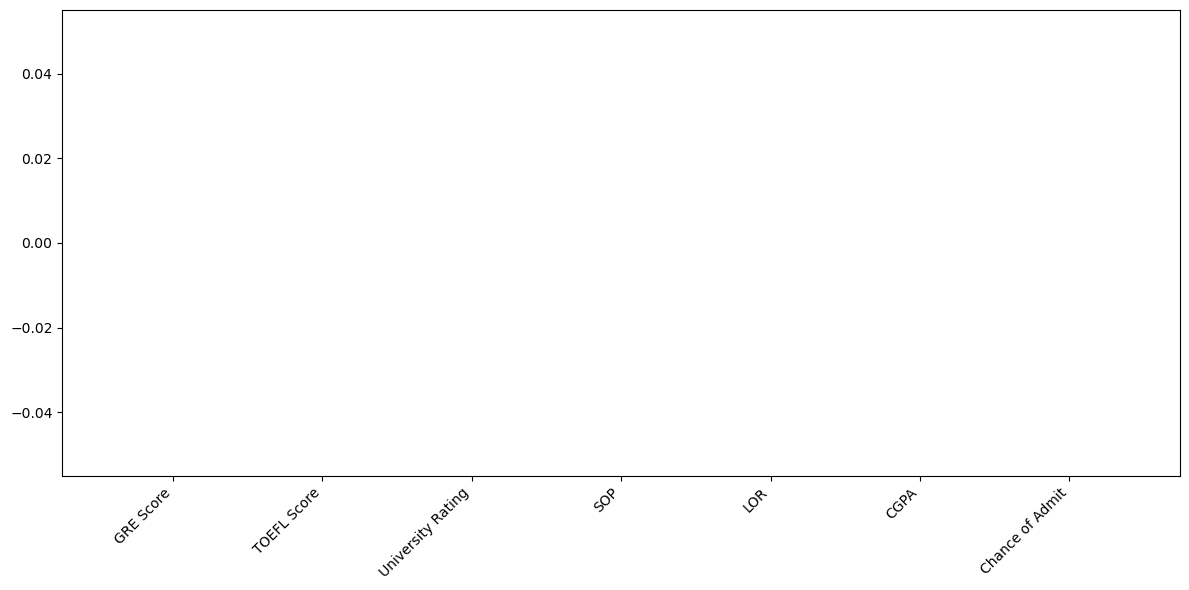

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, result.importances_mean)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

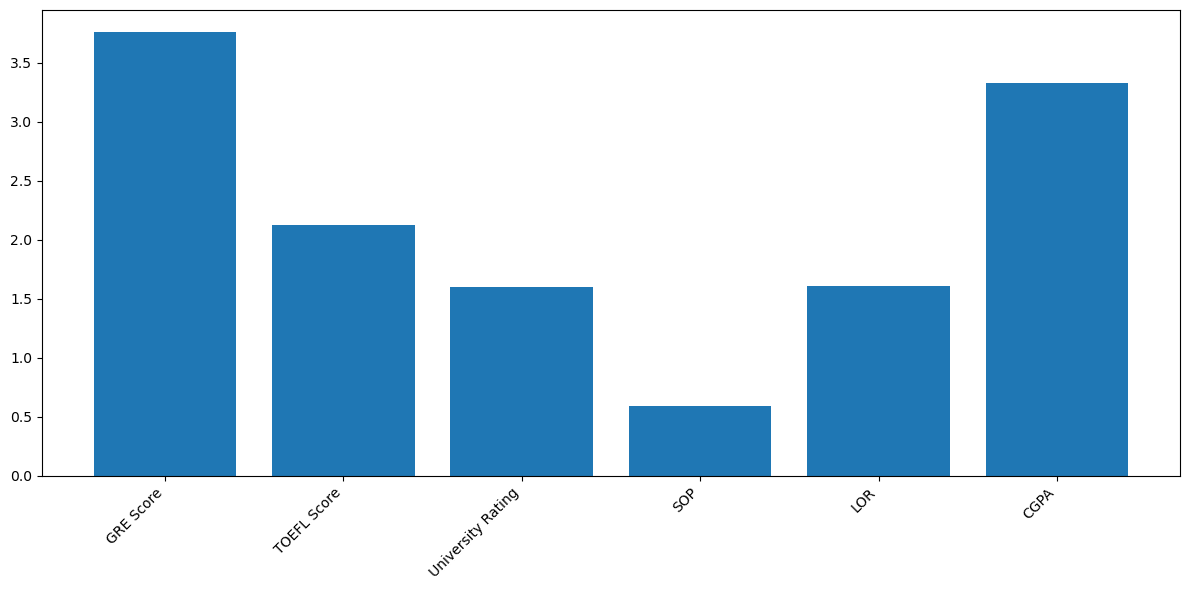

In [7]:
# Logistic Regression

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

X_train = df.drop(['Chance of Admit', 'Accept'], axis=1)
y_reg = df['Chance of Admit']
y_cls = df['Accept']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_cls)

plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, np.abs(log_reg.coef_[0]))
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [8]:
# training ver 1

# from sklearn.neural_network import MLPClassifier
# from sklearn.inspection import permutation_importance

# model = MLPClassifier(hidden_layer_sizes=(10), random_state=1)
# model.fit(X, y)

# # Compute the permutation importance
# result = permutation_importance(model,
#                                 X, 
#                                 y,
#                                 n_repeats=10,
#                                 random_state=1,
#                                 scoring='accuracy')

# # Plot feature importances
# plt.bar(X.columns, result.importances_mean)
# plt.xticks(rotation=45)
# plt.show()

In [9]:
# training ver 2

# from sklearn.inspection import permutation_importance

# # Extract and store model coefficients
# coefficients = model.coef_[0]

# # Compute permutation importance on the test set
# perm_importance = permutation_importance(model,
#                                 X, 
#                                 y,
#                                 n_repeats=20,
#                                 random_state=1,
#                                 scoring='accuracy')

# # Compute the average permutation importance
# avg_perm_importance = perm_importance.importances_mean

# plot_importances(coefficients, avg_perm_importance)

## SHAP Explainability

- SHAP → SHapley Additive exPlanations
- Model-agnostic technique
- Uses shapely values from game theory
- SHAP values → quantify feature contributions to predictions

In [10]:
# Load the dataset
df1 = pd.read_csv("heart.csv")

columns_to_keep = ['age', 'sex', 'cp', 'trestbps', 'restecg', 'thal', 'target']
heart = df1[columns_to_keep]
print(heart.head())

   age  sex  cp  trestbps  restecg  thal  target
0   52    1   0       125        1     3       0
1   53    1   0       140        0     3       0
2   70    1   0       145        1     3       0
3   61    1   0       148        1     3       0
4   62    0   0       138        1     2       0


**mlp_clf**: multilayer perceptron predicting risk of heart disease

In [27]:
# Define features and target
X = heart.drop('target', axis=1)
y = heart['target']

# Optional: Standardize the features for better MLP performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.2, random_state=1)

# Initialize and train the classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), random_state=1)
mlp_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), random_state=1)

In [28]:
ins = pd.read_csv('insurance.csv')

ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy="mean")
ins[['bmi']] = imputer.fit_transform(ins[['bmi']])

# Preprocess categorical columns if any (e.g., one-hot encoding)
ins_encoded = pd.get_dummies(ins, drop_first=True)

# Define features and target
X1 = ins_encoded.drop("charges", axis=1)
y1 = ins_encoded["charges"]

# Scale features
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X1)

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_scaled1, y1, test_size=0.2, random_state=1)

# Build and train the MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,), random_state=1, max_iter=1000)
mlp_reg.fit(X_train1, y_train1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)

**mlp_reg**: multilayer perceptron predicting insurance charges

  0%|          | 0/1025 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:733: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim((slow, shigh))
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:753: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim((slow, shigh))


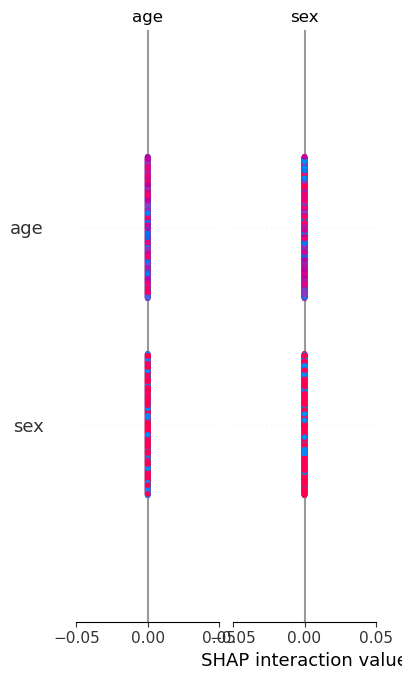

In [34]:
# MPLClassifier

import shap

explainer = shap.KernelExplainer(  
    mlp_clf.predict_proba,   
    shap.kmeans(X, 10)
)

shap_values_cls = explainer.shap_values(X)
shap.summary_plot(shap_values_cls, X)

  0%|          | 0/1338 [00:00<?, ?it/s]

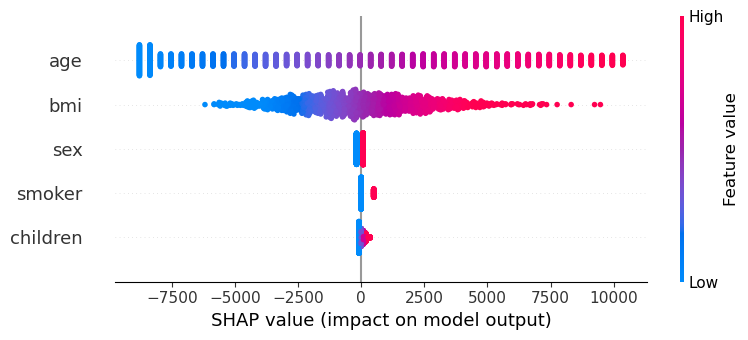

In [41]:
# MPLRegressor

import shap

explainer = shap.KernelExplainer(  
    mlp_reg.predict,   
    shap.kmeans(X1, 10)
)

shap_values_reg = explainer.shap_values(X1)
shap.summary_plot(shap_values_reg, X1)

### Feature Importance

<BarContainer object of 6 artists>

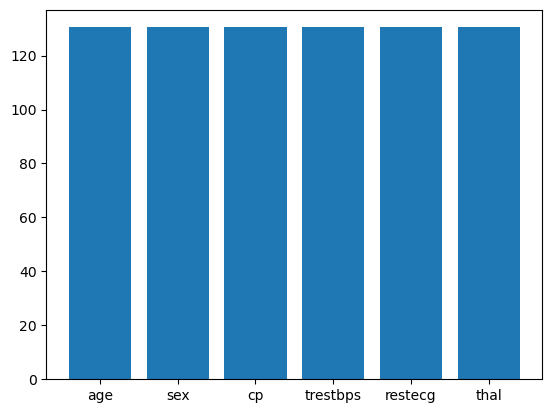

In [39]:
mean_cls = np.abs(shap_values_cls[:,1]).mean(axis=0)
plt.bar(X.columns, mean_cls)

<BarContainer object of 6 artists>

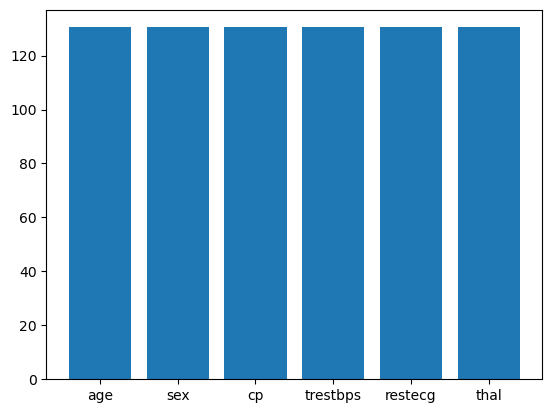

In [43]:
mean_reg = np.abs(shap_values_reg[:,1]).mean(axis=0)

plt.bar(X.columns, mean_reg)